# Machine Learning, Neural Networks, Deep Learning, and Transformers

## Table of Contents

* [Machine Learning Overview](#machine_learning_overview)
* [The Perceptron](#the_perceptron)
    * [Perceptron Example in Python](#perceptron_example_in_python)
    * [Perceptron Example with *scikit-learn*](#perceptron_example_with_scikit)
    * [The Perceptron and Non-Linearly Separable Datasets](#the_perceptron_and_non-linearly_separable_datasets)
* [From the Perceptron to Neural Networks](#from_the_perceptron_to_neural_networks)
* [2-Layer Feed-Forward Neural Network Example](#2-layer_neural_network_example)
    * [Calculating a Feed-Forward Neural Network](#calculating_a_neural_network)
    * [2-Layer Feed-Forward Neural Network in Python](#2-layer_neural_network_in_python)
    * [2-Layer Feed-Forward Neural Network with *Keras*/*TensorFlow*](#2-layer_neural_network_keras_tensorflow)
* [Sources](#sources)

## Machine Learning Overview <a id="machine_learning_overview"></a>
Machine Learning is the **artificial generation of knowledge from experience**, i.e., a system is trained to solve a problem instead of explicitly programming the rules. During a **learning phase** (or **training phase**), the system learns from examples. Afterwards, it should be able to generalize from these examples. The goal of learning/training is to let the algorithm build a statistical model by recognizing patterns and regularities in a set of training data. This model is then tested against test data as it should be able to make predictions for new, unseen data. Machine learning can be used for many problems, providing a wide range of techniques, e.g.:

* **Regression**: linear and logistic regression, naive Bayes
* **Classification**: support vector machines, decision trees (including random forests and boosting)
* **Clustering**: k-means, k-NN, DBSCAN
* **Dimensionality reduction**: principal component analysis (PCA), t-SNE

The following are the most important paradigms of machine learning:

* **Supervised learning**: the data consists of labeled examples, i.e., each data point contains features (= covariates) and an associated label. The goal of supervised learning algorithms is to learn a function that maps feature vectors (inputs) to labels (output). This function is infered from labeled training data, i.e., features are learned using labeled input data. Each example is a pair consisting of an input object (typically a vector) and a desired output value. The function produced by the algorithm can be used for mapping new examples, e.g., for classifying unseen instances.
* **Semi-supervised learning (weak supervision)**: during training, a small set of labeled data is combined with a large set of unlabeled data. This approach results from situations where unlabeled data is abundant and labeled data is expensive to obtain. The algorithm is provided with unlabeled data and supervision examples (but not necessarily for all examples). High-level assumption about the smoothness, low-dimensional structure, or distance metrics of the labeled data are used to infer the correct labels for the unlabeled data.
* **Unsupervised learning**: the algorithm learns patterns from unlabeled input data. It is often used to discover hidden patterns (anomaly detection) and data groupings (clustering), or to perform principal component analysis for dimensionality reduction.
* **Self-supervised learning**: the algorithm does not need human-annotated labels and is fed unlabeled data. Usually, the neural network is first presented with a pretext task to initialize the model parameters. This task is often based on pseudo labels that have been derived from the unlabeled input data. Afterwards, a downstream task (i.e., the actual task) is solved utilizing supervised or unsupervised learning.

The following packages are used for the examples in this notebook:

In [1]:
%%capture --no-display

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from sklearn import datasets                         # To create linearly separable dataset
from sklearn.model_selection import train_test_split # For splitting test and training data
from sklearn.metrics import confusion_matrix         # For confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay   # To plot confusion matrix
from sklearn.metrics import classification_report    # For classification report
from sklearn.linear_model import Perceptron          # sklearn Perceptron class

## The Perceptron <a id="the_perceptron"></a>

At its core, a neural network is a collection of simple processing units (**perceptrons**). The concept of a "neuron" was first introduced in 1943 by Warren McCulloch and Walter Pitts (McCulloch-Pitts neuron),<a name="footnote_ref-1"></a>[<sup>1</sup>](#footnote-1) the first implementation of a perceptron was built in 1958 by Frank Rosenblatt.<a name="footnote_ref-2"></a>[<sup>2</sup>](#footnote-2) The perceptron is a **linear classifier** (also known as **threshold processing unit**) and consists of the following components:
* A set of inputs, consisting of
    * input information ($X_1 \ldots X_n$), and
    * weights ($w_1 \ldots w_n$),
* A bias ($X_0$, where $X_0=1$). The bias is necessary to shift the activation function (see below) to the left or right. This is critical for successful learning, as it gives the algorithm more flexibility.
* A sum function to aggregate the inputs, and
* An activation function which leads to a single output.

<img src="./img/perceptron.png" style="margin:auto"/>

The weights $w_1 \ldots w_n$ are the heart of the perceptron, as they determine the strength of each input signal to it, i.e., the input signals $X_1 \ldots X_n$ interact multiplicatively with the weights (e.g., $X_1 \cdot w_1$). The perceptron then computes the weighted sum of the inputs (i.e., it calculates a dot product with the input and its weights) and adds the bias to it - this is the calculation of the **class score**:

$$z = {\sum_{i} X_i w_i} + X_0 w_0$$

Afterwards, an activation function is applied to the class score, i.e., a mathematical function to determine the output given its input. In other words, the activation function specifies if the perceptron will be activated or not. Perceptrons generally use a threshold activation function which determines the activation decision through a combination fo the sum function's input and a throshold value. In this example, the **Heaviside step function** is used. It outputs $1$ if the input value (the result of the sum function) is $\ge 0$ and $0$ if the input value is $< 0$:

$$H(x) = \begin{cases} 1 \text{ if } x \ge 0 \\ 0 \text{ if } x < 0 \end{cases}$$

The algorithm to use a perceptron as a linear classifier therefore works as follows:<a name="footnote_ref-3"></a>[<sup>3</sup>](#footnote-3)
1. Initialize the weights (either by assigning them the value 0 or another small random value).
2. For each training sample $X_n$:
    1. Calculate the output value, i.e., multiply the input with its weight, add the bias and apply the activation function.
    2. Compare the prediction with the desired output and update the weights
        1. If the output is correct, the weight remains unchanged.
        2. If the output is 0 but should be 1, the weights are incremented.
        3. If the output is 1 but should be 0, the weights are decremented.
    3. Repeat until the model converges.

The following image shows the usage of a perceptron as a **linear classifier**. There are 2 classes (red and blue) and 2 dimensions ($X_1$ and $X_2$). The goal is to fit an optimal  hyperplane that correctly separates the data into two classes. It takes the result of $\sum_{i} X_n w_n + X_0 w_0$ (i.e., the **activation**) and determines whether a data point is below or above the hyperplane. If the activation is $ \ge 0$, the model outputs 1, if the activation is $< 0$, it outputs 0.<a name="footnote_ref-4"></a>[<sup>4</sup>](#footnote-4)

<img src="./img/perceptron_linear_classifier.png" style="margin:auto"/>

### Perceptron Example in Python <a id="perceptron_example_in_python"></a>

The following example ins an implementation of the perceptron with randomly generated synthetic data. For convenience, linearly separable data is generated with the `make_blobs` function from *scikit-learn*. It outputs two *NumPy* arrays:
* `X` is a 2-dimensional array containing the characteristics of the data points (in this case x and y values which can be viewed as coordinates).
* `y` is a 1-dimensional array containing the class labels (*0* or *1*).

The sample data consists of two normally distributed clusters of data points with a label assigned to each cluster.<a name="footnote_ref-5"></a>[<sup>5</sup>](#footnote-5) The data set is plotted below; the data with class label *0* is displayed in green, the data with class label *1* is displayed in blue.



In [2]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn import datasets
# %matplotlib inline

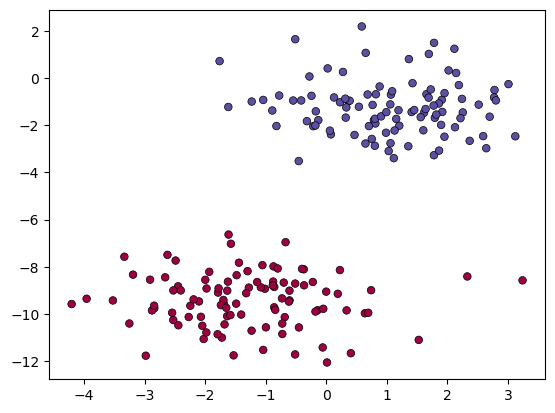

In [3]:
np.random.seed(1)

# Generate a linearly separable dataset
X, y = datasets.make_blobs(n_samples = 200,
                           n_features = 2,
                           centers = 2,
                           cluster_std = 1.1,
                           random_state = 2)

# Plot dataset
plt.scatter(X[:, 0], X[:, 1], c = y, s = 30, cmap = plt.cm.Spectral, edgecolors="black", linewidths = 0.5)
plt.show()

Now, two functions are defined: `train_perceptron` to train the perceptron on training data, and `predict_perceptron` to make predictions on test data.<a name="footnote_ref-6"></a>[<sup>6</sup>](#footnote-6)

The first part of the training function is straightforward: calculate the dot product of input and weight, add the bias, and pass the result through the Heaviside activation function (which is imported from *NumPy*).

Then the weights and bias are updated according to the algorithm:
* The comparison between actual value and predicted value happens in the `(y[i] - y_pred[i])` part:
    * If the prediction is correct, this part results in 0 and the weight remains unchanged.
    * If the prediction is 0 but should be 1, the weights are incremented due to the positive sign of the subtraction result.
    * If the prediction is 1 but should be 0, the weights are decremented due to the negative sign of the subtraction result.
* The new weight is then calculated with inputs from the learning rate and the training training data, e.g. for the initial iteration:

$$\underbrace{0.01}_{\text{Learning rate}} \cdot \underbrace{(1 - 0.0)}_{\text{Actual vs pred}} \cdot \underbrace{0.31994533}_{\text{input} X_{1_1}}
$$

The function also takes two **hyperparameters** that are used by the supervisor to directly control the perceptron's behavior and tune the training process:
* **Epochs**: an epoch is an entire passing of the training data through the algorithm (as training data is usually broken down into smaller batches to circumvent storage space limitations).
* **Learning rate**: the learning rate controls who much the model changes in response to the estimated error when the weights are updated. This is one of the most important parameters. If the parameter is too small, the learning process might be prolonged and might get stuck, if it is too big, the changes to the weights might be too severe and the result might not be optimal.

In [4]:
def train_perceptron(X, y, weights, bias, epochs, learning_rate):
    """Implementation of the perceptron training algorithm.
    
    Args:
    X             -- Input data (numpy array)
    y             -- Classes of the input data (numpy array)
    weights       -- Weight vector (numpy array)
    bias          -- Initial bias (float or integer)
    epochs        -- Number of epochs (hyperparameter - float or integer)
    learning_rate -- Learning rate (hyperparameter - float or integer)
    """
    for epoch in range(epochs):
        # For each training example
        for i in range(len(X)):
            # Calculate class score (dot product of input and weight + bias)
            z = np.dot(X, weights) + bias
            # Pass the class score through the activation function to calculate the prediction
            y_pred = np.heaviside(z, 0)
            
            # Update the weights and bias
            weights += learning_rate * (y[i] - y_pred[i]) * X[i]
            bias += learning_rate * (y[i] - y_pred[i])
        
        # Print current progress
        if epoch % 10 == 0:
            print(f"Epoch {epoch} complete.")
        elif epoch == epochs - 1:
            print("Training complete.")
        
    return weights, bias
    
def predict_perceptron(X, weights, bias):
    """Predict the class of input data with a perceptron.
    
    Args:
    X       -- Input data (NumPy array)
    weights -- Weight vector (NumPy array)
    bias    -- Bias (float)
    """
    z = np.dot(X, weights) + bias
    prediction = np.heaviside(z, 0)
    return prediction

Now, the parameters will be initialized and the dataset is prepared for training. The weights and the bias are both set to 0, but any random small value can be used instead. The `train_test_split` function is imported from *scikit-learn* to easily split the data into a training and a test set. In this case, an 80:20 rate (80% training data/20% test data) is chosen via the `test_size` parameter. 

In [5]:
# from sklearn.model_selection import train_test_split

# Initialize parameters
weights = np.zeros(X.shape[1])
bias = 0

# Define the hyperparameters
learning_rate = 0.01
epochs = 100

# Split the dataset into test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Now the model can be trained with the `train_perceptron` function defined above. It returns the learned weights and bias which are saved to corresponding variables. 

In [6]:
weights_learned, bias_learned = train_perceptron(X_train, y_train, weights, bias, epochs, learning_rate)
print(10 * "-")
print(f"Learned weights: {weights_learned}")
print(f"Learned bias: {bias_learned}")

Epoch 0 complete.
Epoch 10 complete.
Epoch 20 complete.
Epoch 30 complete.
Epoch 40 complete.
Epoch 50 complete.
Epoch 60 complete.
Epoch 70 complete.
Epoch 80 complete.
Epoch 90 complete.
Training complete.
----------
Learned weights: [0.03473729 0.03384782]
Learned bias: 0.11999999999999998


We can now use the learned parameters to make predictions with the unseen test data set `y_test` using the previously defined `predict_perceptron` function. This function multiplies the test input values by the learned weights and adds the learned bias. The resulting score is passed through the Heaviside step function to obtain the predicted class of each input.

In [7]:
pred = predict_perceptron(X_test, weights_learned, bias_learned)

We can now determine the quality of the model's prediction by comparing the trained class labels with the actual class labels in a **confusion matrix**. For this purpose, two corresponding functions are imported from *scikit-learn*: `confusion_matrix`<a name="footnote_ref-7"></a>[<sup>7</sup>](#footnote-7) for creating the matrix, and `ConfusionMatrixDisplay`<a name="footnote_ref-8"></a>[<sup>8</sup>](#footnote-8) for plotting it in a nice manner.

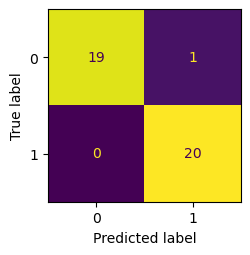

In [8]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf = confusion_matrix(pred, y_test)
disp = ConfusionMatrixDisplay(conf)
fig, ax = plt.subplots(figsize = (2.5, 2.5))
disp.plot(ax = ax, colorbar = False)
plt.show()

The confusion matrix displays a comparison between the predicted class labels and the actual class labels in the following way:

```
┌─────────────────────┬─────────────────────┐
│ True Positive (TP)  │ False Negative (FN) │
├─────────────────────┼─────────────────────┤
│ False Positive (FP) │ True Negative (TN)  │
└─────────────────────┴─────────────────────┘
```

It shows that one class label has been misclassified: one data point of class 0 (i.e., the class plotted in green) has been classified as class 1.

The quality of the model's prediction can also be determined in the form of a **classification report**. The report is obtained via the `classification_report`<a name="footnote_ref-9"></a>[<sup>9</sup>](#footnote-9)<sup>,</sup> <a name="footnote_ref-10"></a>[<sup>10</sup>](#footnote-10) function from *scikit-learn*.

In [9]:
# from sklearn.metrics import classification_report

report = classification_report(pred, y_test, digits = 2, zero_division = 0.0)
print(f"Classification Report:\n {report}")

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.95      0.97        20
         1.0       0.95      1.00      0.98        20

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



The classification report provides the following metrics to quantify the quality of the model's predictions:

* **Precision** (also known as **positive predictive value**): the model's ability to correctly label a sample (i.e., to not label a positive sample as negative).<a name="footnote_ref-11"></a>[<sup>11</sup>](#footnote-11) It is defined as

$$P = \frac{\text{relevant retrieved instances}}{\text{all retrieved instances}} = \frac{TP}{TP + FP}$$

* **Recall** (also known as **sensitivity**): the model's ability to find all relevant (e.g., positive) samples.<a name="footnote_ref-11"></a>[<sup>11</sup>](#footnote-11) It is defined as

$$R = \frac{\text{relevant retrieved instances}}{\text{all relevant instances}} = \frac{TP}{TP + FN}$$

* **F1-score** (also known as **balanced F-score**): a combination of precision and recall by calculating their harmonic mean.<a name="footnote_ref-12"></a>[<sup>12</sup>](#footnote-12) It is defined as

$$F = 2 \frac{P \cdot R}{P + R}$$

* **Support**: the number of occurrences of each class.

* **Accuracy**: the model's ability to correctly identify or exclude a condition, i.e., the proportion of correct predictions - true positives and true negatives - among the total number of cases examined.<a name="footnote_ref-13"></a>[<sup>13</sup>](#footnote-13) It is defined as

$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

The precision, recall, and F1 scores are slightly below 1.00, which is a result of the misclassified data point. 

Finally, we can plot the result, i.e., the **decision boundary** with the `plot_perceptron` function defined below.

In [10]:
def plot_perceptron(X_test, y_test, X_train, y_train, X, y, W, b):
    """Plot the input of a perceptron with the decision boundary.
    
    Args:
    X_test  -- Test data to plot (numpy array)
    y_test  -- Test classification lables (numpy array)
    X_train -- Training data to plot (numpy array)
    y_train -- Training classification lables (numpy array)
    X       -- Dataset to plot (numpy array)
    y       -- Classification lables (numpy array)
    W       -- Weight vector of the trained perceptron (numpy array)
    b       -- Bias of the trained perceptron (float)
    """
    # Define bounds of the plotting surface
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 0].max() + 0.5
    
    # Define x and y scale (resolution)
    x_grid = np.arange(x_min, x_max, 0.05)
    y_grid = np.arange(y_min, y_max, 0.05)
    
    # Create a grid from x and y scale
    xx, yy = np.meshgrid(x_grid, y_grid)
    
    # Flatten the grid to 2 vectors
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    
    # Stack the vectors horizontally (i.e., in 2 columns) to create inputs for the model
    grid = np.hstack((r1, r2))
    
    # Make predictions on the grid
    yhat = predict_perceptron(grid, W, b)
    
    # Reshape the predictions back into a grid
    zz = yhat.reshape(xx.shape)
    
    # Define levels to plot
    levels = [0, 0.5, 1]
    colors = ["#e95c47", "#54aead"]
    
    # Generate plot and subplots; general formatting
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex = True, sharey = True)
    fig.set_figheight(5)
    fig.set_figwidth(15)
    fig.suptitle("Perceptron decision boundary", fontsize = 12)
    
    # Generate subplot for test data
    ax1.contourf(xx, yy, zz, colors = colors, levels = levels, alpha = 0.5)
    ax1.scatter(X_test[:, 0], X_test[:, 1], c = y_test, s = 30, cmap = plt.cm.Spectral, edgecolors="black", linewidths = 0.5)
    ax1.set_title("Test data", fontsize = 10)
    
    # Generate subplot for training data 
    ax2.contourf(xx, yy, zz, colors = colors, levels = levels, alpha = 0.5)
    ax2.scatter(X_train[:, 0], X_train[:, 1], c = y_train, s = 30, cmap = plt.cm.Spectral, edgecolors="black", linewidths = 0.5)
    ax2.set_title("Training data", fontsize = 10)
    
    # Generate subplot for entire dataset
    ax3.contourf(xx, yy, zz, colors = colors, levels = levels, alpha = 0.5)
    ax3.scatter(X[:, 0], X[:, 1], c = y, s = 30, cmap = plt.cm.Spectral, edgecolors="black", linewidths = 0.5)
    ax3.set_title("Entire dataset", fontsize = 10)
    
    plt.show()

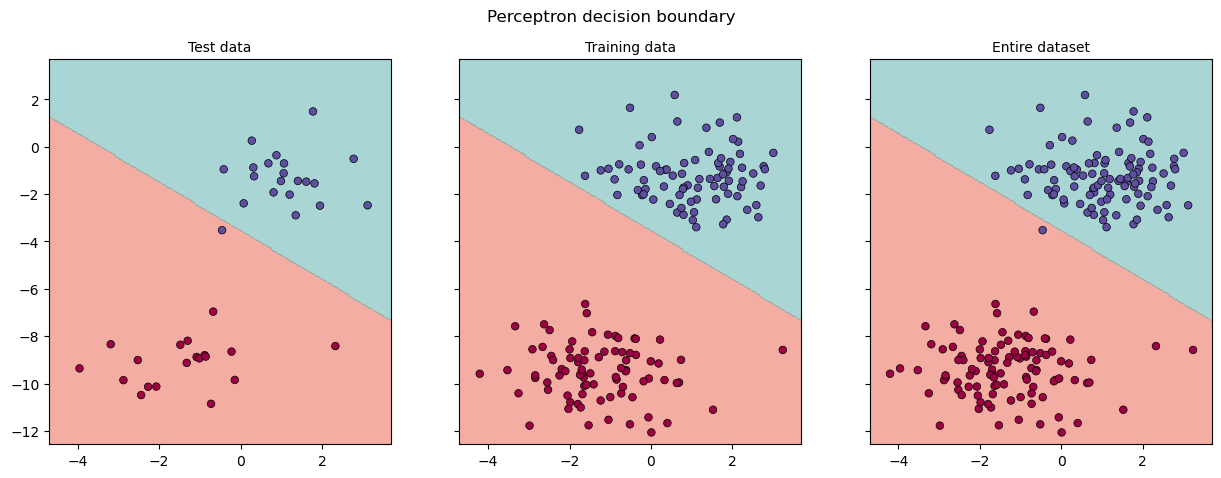

In [11]:
plot_perceptron(X_test, y_test, X_train, y_train, X, y, weights_learned, bias_learned)

The plots visually show the data point that has been misclassified as identified by the confusion matrix and the classification report. It also visualizes the reason for the misclassification: it is due to the split of the training data set. The decision boundary as learned by the model splits the training data perfectly, but one data point of the test data is below the decision boundary.

### Perceptron Example with *scikit-learn* <a id="perceptron_example_with_scikit"></a>

Finally, we can also train a second perceptron by using **scikit-learn's `Perceptron` class**. *scikit-learn* (also known as *sklearn*) is a machine learning library based on *NumPy* and *SciPy* that features various regression, classification, and clustering algorithms. Its `Perceptron` class comes with many functions that make training a perceptron very easy.

In [12]:
# from sklearn.linear_model import Perceptron
skl_perceptron = Perceptron(random_state = 1)
skl_fit = skl_perceptron.fit(X_train, y_train)
skl_score = skl_perceptron.score(X_test, y_test)

print(skl_score)

0.975


The accuracy score for the *sklearn* model is the same as for the implementation from scratch, which means that the same data point as above has likely been misclassified.

### The Perceptron and Non-Linearly Separable Datasets <a id="the_perceptron_and_non-linearly_separable_datasets"></a>

A single perceptron has a major drawback: it only works for data that is linearly separable. This is due to the way the algorithm works as it is based on the idea of adjusting the weights until the output of the perceptron matches the desired output. If applied to linearly separable data, the perceptron algorithm is **guaranteed to converge**, i.e., it is able to find a set of weights that allows it to correctly classify all training examples.

However, this is not the case with data that is not linearly separable as shown below. The following function generates a spiral dataset that cannot be seperated linearly. It takes 3 arguments (number of points per class, number of dimensions, and number of classes) to easily create different suitable datasets.

In [13]:
def generate_spiral_dataset(N, D, K):
    """Generate a spiral dataset.
    
    Args:
    N -- Number of points per class (integer)
    D -- Number of dimensions (integer)
    K -- Number of classes (integer)
    """
    # Calculate the rotation
    rotation = np.pi * 2 * 2

    # Generate data points for each class
    for k in range(K):
        # Create empty arrays during the first iteration of the loop
        if k == 0:
            # Create empty 2-dimensional array for the synthetic data points.
            # Dimension 1 = size N*K, dimension 2 = size D
            X = np.zeros((N*K, D))
            # Create empty 1-dimensional array for class labes of size N*K
            y = np.zeros(N*K, dtype="uint8")  
        
        # Generate N evenly spaced numbers in interval [0.05,1]    
        radius = np.linspace(0.05, 1, N)
        # Calculate the angle
        theta = np.linspace((k-1)*rotation/(K+1-K%2), k*rotation/(K+1-K%2), N) + np.random.randn(N)*0.2
        # Get range of current class
        current_class_range = range(N*k, N*(k+1))
        
        # Calculate data point coordinates and concatenate the two arrays along the second axis.
        X[current_class_range] = np.c_[radius*np.sin(theta), radius*np.cos(theta)]
        # Fill label array with class labels
        y[current_class_range] = k
        
    return X, y

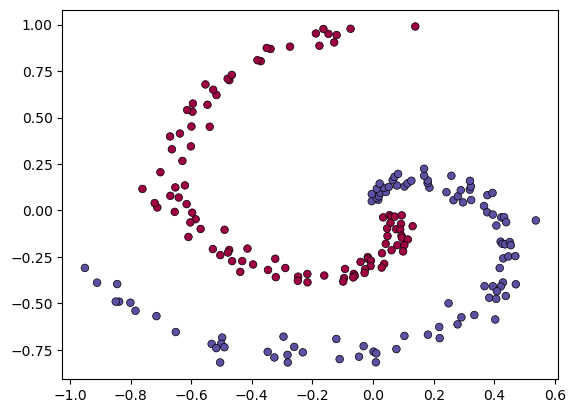

In [14]:
np.random.seed(1)
X_spiral, y_spiral = generate_spiral_dataset(100, 2, 2)

plt.scatter(X_spiral[:, 0], X_spiral[:, 1], c = y_spiral, s = 30, cmap = plt.cm.Spectral, edgecolors="black", linewidths = 0.5)
plt.show()

Now, we will go through the same steps as with the linearly separable dataset above:

1. Parameter initialization
1. Hyperparameter definition
1. Test/train split
1. Model training
1. Prediction generation on test data
1. Print classification report
1. Plot the decision boundary

Epoch 0 complete.
Epoch 10 complete.
Epoch 20 complete.
Epoch 30 complete.
Epoch 40 complete.
Epoch 50 complete.
Epoch 60 complete.
Epoch 70 complete.
Epoch 80 complete.
Epoch 90 complete.
Training complete.
----------
Learned weights: [ 0.00944065 -0.0199036 ]
Learned bias: 0.01
----------

 Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.47      0.64        40

    accuracy                           0.48        40
   macro avg       0.50      0.24      0.32        40
weighted avg       1.00      0.47      0.64        40



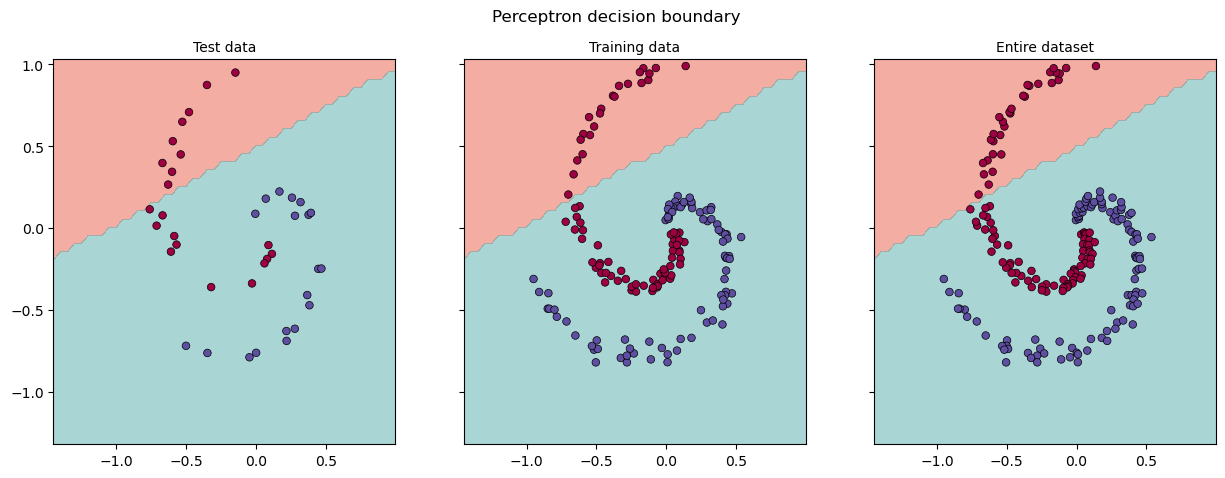

In [15]:
# Parameter initialization
weights_spiral = np.zeros(X_spiral.shape[1])
bias_spiral = 0

# Hyperparameter definition
learning_rate_spiral = 0.01
epochs_spiral = 100

# Test/train split
X_spiral_train, X_spiral_test, y_spiral_train, y_spiral_test = train_test_split(X_spiral, y_spiral, test_size = 0.2, random_state = 42)

# Model training
weights_spiral_learned, bias_spiral_learned = train_perceptron(X_spiral_train, y_spiral_train, weights_spiral, bias_spiral, epochs_spiral, learning_rate_spiral)
print(10 * "-")
print(f"Learned weights: {weights_spiral_learned}")
print(f"Learned bias: {bias_spiral_learned}")

# Test data prediction
pred_spiral = predict_perceptron(X_spiral_test, weights_learned, bias_learned)

# Print classification report
report_spiral = classification_report(pred_spiral, y_spiral_test, digits = 2, zero_division = 0.0)

print(10 * "-")
print("\n Classification Report:")
print(report_spiral)

# Plot decision boundary
plot_perceptron(X_spiral_test, y_spiral_test, X_spiral_train, y_spiral_train, X_spiral, y_spiral, weights_spiral_learned, bias_spiral_learned)

## From the Perceptron to Neural Networks <a id="from_the_perceptron_to_neural_networks"></a>

To be able to separate non-linearly separable datasets, multiple perceptrons can be combined into a structure known as **multi-layer perceptron** (MLP), a simple type of neural networks (also referred to as *vanilla neural network*). MLPs are able to solve non-linear problems, as they can use non-linear activation functions, commonly **sigmoid** or **Rectified Linear Unit (ReLU)**. Formally, "true" perceptrons are a special case of artificial neurons that use a threshold activation function (such as Heaviside) and only perform binary classification.<a name="footnote_ref-14"></a>[<sup>14</sup>](#footnote-14) Combining multiple perceptrons into a neural network basically has two effects:

1. Neural networks are able to store more information with increasing complexity (due to an increased number of parameters).
2. MLP neurons can perform regression **or** classification, depending on their activation function.

In a neural network, the output of some neurons becomes the inputs of other neurons. The **network topology** describes the number of neurons and the number of layers they are organized in, the most common type being **fully-connected layers** where neurons between two adjacent layers are fully pairwise connected, but no neurons share connections within the same layer. Neural networks have three types of layers:

1. Input layer
2. Hidden layer(s)
3. Output layer

The term **deep learning** refers to the number of layers within the network. As a rule of thumb, a neural network with more than three layers can be considered a deep learning algorithm. When determining the number of layers in a network, the input layer is not counted. Therefore, the following image displays a 2-layer and a 3-layer neural network:

<img src="./img/neural_networks.png" style="margin:auto"/>

The **type of the neural network** is determined by the information flow thorugh the network:

* **Feed-forward neural networks** have a uni-directional data flow, i.e., directly from the input layer through the hidden layer(s) to the output layer. They are trained using backpropagation and are commonly known as "vanilla neural networks". Examples are perceptrons, multilayer perceptrons, and convolutional neural networks.
* **Convolutional neural networks** are a type of feed-forward neural networks that is commonly used for image and speech recoginition, and reinforcement learning. Convolutional neural networks optimized for image recognition use convolutional filters to activate certain image features.
* **Recurrent neural networks** have a bi-directional data flow, i.e., nodes within one layer can have connections to nodes of the same or subsquent layers. Recurrent neural networks have a memory that uses information from previous inputs to influence the current output. LSTMs (long short-term memory) are an example for recurrent neural networks that are used in speech recognition, handwriting recognition, or semantic parsing.
* **Transformers** extended the concepts of recurrent neural networks and LSTMs and provide longer-term memory (which gives them a larger window to reference from) and require less training time due to parallelized processing of input sequences. They are currently the prevalent model type to train large language models that are used, for example, for machine translation, and document and text generation.

## 2-Layer Feed-Forward Neural Network Example <a id="2-layer_neural_network_example"></a>

Compared to a single perceptron, a neural network has the following differences:

* One or multiple **hidden layers** are added to build the neural network.
* As noted above, the neurons of the neural network can have **non-linear activation functions** such as sigmoid or ReLU.
* A **loss function** is added to measure the quality of the outcome and adjust the weights during training.<a name="footnote_ref-15"></a>[<sup>15</sup>](#footnote-15)<sup>, </sup><a name="footnote_ref-16"></a>[<sup>16</sup>](#footnote-16) This function calculates a "loss" which indicates the quality of the model's prediction. The aim is to adjust the neural network's parameters in a way that reduces the loss (i.e., by optimizing the loss function) and therefore improves its predictive qualities. This is done by calculating a **gradient** which is **backpropagated** through the network layers to perform the neccessary changes on the network parameters. The choice of the loss function depends on the neural network type and the activation function used in the neurons,<a name="footnote_ref-17"></a>[<sup>17</sup>](#footnote-17) e.g.:
    * **Regression** loss functions: mean squared error, mean absolute error, quadratic loss
    * **Classification** loss functions: cross entropy (binary cross entropy, categorical cross entropy), hinge loss
* The usage of a loss function and backpropagation requires the usage of the following **hyperparameters**:
    * **Epochs**: same as the perceptron.
    * **Learning rate**: same as the perceptron, also known as **step size**.
    * **Regularization strength** $\lambda$: controls the overall impact of the regularization term of the loss function to ensure the right balance between overfitting and underfitting.

### Calculating a Feed-Forward Neural Network <a id="calculating_a_neural_network"></a>

The following is a detailed explanation of the various steps taken when classifying data with a neural network.<a name="footnote_ref-18"></a>[<sup>18</sup>](#footnote-18)

#### 1. Weight & Bias Initialization
Since the neural network contains a hidden layer, more parameters are necessary than for the perceptron, i.e., an additional set of weights and biases is needed for the hidden layer. To better illustrate the parameter implementation, the actual values from the spiral data set and the [neural network implementation below](#2-layer_neural_network_in_python) are used:
* `D` (number of dimensions): 2
* `h` (size of the hidden layer): 100
* `K` (number of classes): 3

The weights of the neural network are implemented as weight **matrices** (contrary to the perceptron, which only utilized a weight vector) as they make using matrix vector operations easy across all neurons. The **network topology** depends on the data:
* The number of neurons in the input layer equals the *number of dimensions* of the input data. 
* The number of neurons in the output layer equals the *number of classes* of the data.
* The number of neurons in the hidden layer is arbitrary and can be optimized via parameter tuning.

The weights and bias are therefore defined as follows:
* The hidden layer weights `W` are a matrix of shape `(D, h)` - we have 2 dimensions and 100 neurons in the hidden layer.
* The bias of the hidden layer `b` is a matrix of shape `(1, h)` - one bias for each neuron of the hidden layer.
* The weights of the output layer `W2` are a matrix of shape `(h, K)` - we have 100 neurons in the hidden layer and 3 classes in the output layer.
* The bias of the output layer `b2` is a matrix of shape `(1, K)` - one bias for each neuron of the output layer.
* In contrast to the perceptron example, random small numbers are used as initial weights instead of 0. The *numpy* function `randn` generates a normally distributed sample which is multiplied by 0.01 to obtain an array of small random normally distributed numbers.

#### 2. Hidden Layer: Calculation of Class Scores (ReLU)
As with the perceptron, the class scores of the hidden layer can now be calculated via the dot product of the input and the hidden layer's weights, adding the bias, and applying the activation function - in this case, a **ReLU** nonlinearity. ReLU keeps positive inputs and replaces negative inputs with 0:

$$f(x) = max(0, x) = \begin{cases} x_i \text{ if } x_i \geq 0 \\ 0 \text{ if } x_i < 0 \end{cases}$$

where $x$ = the neuron's input value

ReLU has been found to be less computationally expensive, less prone to vanishing gradients, and to provide better results overall than other activation functions, making it a very popular activation function for modern deep neural networks.<a name="footnote_ref-19"></a>[<sup>19</sup>](#footnote-19)<sup>, </sup><a name="footnote_ref-20"></a>[<sup>20</sup>](#footnote-20)

#### 3. Output Layer: Calculation of Class Probabilities (Softmax)

The hidden layer's activation is then multiplied with the output layer's weights and the bias is added. The result is a matrix of shape `(300, 3)` which contains the scores of the output layer - one score for each class for each example. To obtain the class probabilities, a **softmax activation function** (also known as **normalized exponential function**) is applied to output layer's scores. The aim is to obtain a probability distribution for the assignment of a point to each class. After applying softmax, all components are in the interval (0, 1) and sum up to 1.

$$\sigma(z)_i = \frac{e^{z_j}}{\sum_{k} e^{z_k}}$$

The softmax function does the following:
1. The scores $z_i$ are interpreted as unnormalized log probabilities for each class, therefore, they are first exponentiated (i.e., the standard exponential function is applied as it inverses the logarithmic function).
2. The values obtained in step 1 are normalized by dividing them by the sum of all exponentials.

The resulting object `probs` is a matrix of shape `(300, 3)` that contains the calculated normalized class probabilities.

#### 4. Computation of the Loss (Average Cross-Entropy Loss and Regularization Loss)
**Cross-entropy** is used to measure the difference between two probability distributions - a "true" distribution $p$ and an estimated distribution $q$. The higher the probability of the true class, the smaller the cross-entropy.<a name="footnote_ref-21"></a>[<sup>21</sup>](#footnote-21) It has the form

$$L_i = -\text{log} \left( \frac{e^{z_{yi}}}{\sum_j e^{z_j}} \right)$$

where $z_j$ is the $j$-th element of the vector of class scores $z$ and $z_{y_i}$ is the score value of the true class. The array `y` contains the correct class probabilities and is used to select the probability from each row that corresponds to the correct class label. The results are stored in the `correct_logprobs` array, which is passed into the *NumPy* `log` function to obtain the unnormalized true probability. The full loss over the entire data set is therefore the mean of $L_i$ across all $N$ training examples:

$$L = \frac{1}{N} \sum_{i} \underbrace{L_{i}}_{\text{cross-entropy for example } i}$$

The **regularization loss** is used to prevent problems that are inherent to the cross-entropy loss on its own. There might be a certain set of weights `W` that classifies all examples correctly. However, this set of weights might not be unique, as any multiples of these weights will always yield the same result. Regularization establishes some preference for a certain set of weights to remove this ambiguity, e.g., by favoring smaller weights. This improves generalization as no single input dimension can have a large influence on the scores on its own (as the weights control the influence of any given input dimension).

The regularization loss (in this case L<sub>2</sub> regulation) is a function of the weights that sums up all squared elements of $W$ (i.e., each layer's weights are summed up and these results are summed up again:

$$R(W) = \sum_k \sum_l W^{2}_{k,l}$$

The **full loss** is defined as the the average cross-entropy loss over the examples and the regularization. The goal is to **minimize the loss** as much as possible by bringing its value close to 0 (i.e., the higher the correct class probability, the lower the loss). The regularization part also contains two additional parameters:

* **Regularization strength/regularization rate** $\lambda$: a hyperparameter to control the overall impact of the regularization term. L<sub>2</sub> regulation has a tendency to encourage weight values towards 0 (as a means to minimize the loss) and a weights mean toward 0. The $\lambda$ hyperparameter aims to ensure the right balance between overfitting and underfitting.<a name="footnote_ref-22"></a>[<sup>22</sup>](#footnote-22)
* **Convenience factor** $\frac{1}{2}$: a constant to determine the loss contribution for the regularization gradient (see below).

Therefore, the complete loss is calculated as

$$L = \underbrace{\frac{1}{N} \sum_{i} L_i}_{\text{cross-entropy loss}} + \underbrace{\frac{1}{2} \lambda \sum_k \sum_l W^{2}_{k,l}}_{\text{regularization loss}}$$

#### 5. Loss Minimization: Gradient Descent
Now that the loss is known, it should be minimized. We start with random parameters for `W` and `b` which result in a first iteration of the loss function. The loss function should be optimized in a way (i.e., by changing the parameters) so that the loss is as low as possible. This is achieved with **gradient descent**: the gradient of the loss function is analyzed with respect to the parameters. By taking steps in the opposite direction of the gradient, a local minimum can be found. The parameters are then changed so that the loss is decreased.

The gradient is a derivative ($\partial$) of the loss function $L_i$ which indicates the best direction along which the weight vector should be changed for the steepest descent when applied to the vector of computed scores $z$. The intermediate variable $p$ is a vector that holds all normalized class probabilities:

$$\frac{\partial L_i}{\partial z_k} = p_k - 1 (y_i = k)$$

Basically, this expression means that the correct class score ($y_i = k$) is identified and subtracted by 1. This gives a direct indication of how much the correct class socre should be changed:<a name="footnote_ref-23"></a>[<sup>23</sup>](#footnote-23)

* The calculated score of the correct class should be as close to 1 as possible. If the calculated score is already close to 1, the gradient will be in a small negative number (e.g., $0.9 - 1 = -0.1$). This means that the class score must only be increased a little bit.
* If the calculated score of the correct class is far from 1, the gradient will be a bigger negative number (e.g., $0.3 - 1 = -0.7$), indicating that the class score must be increased more as this reduces the loss.

The gradient is computed based on all samples of the training set. Therefore, it is divided by the number of examples (i.e., the size of the training set) to make it independent of the number of training examples.<a name="footnote_ref-24"></a>[<sup>24</sup>](#footnote-24)

#### 6. Backpropagation and Parameter Update
Backpropagation is a backward pass to adjust the neural network's parameters to minimize errors. This is achieved by a matrix multiplication of the gradients and the weights back through all layers.

1. The first backpropagation is on the output layer which results in the updated weights `dW2` and bias `db2`.
    1. To obtain the backpropagated weights `W` of the input layer, we multiply the class scores on the hidden layer matrix (`hidden_layer`) by the gradients array (`dscores`). `hidden_layer` is transposed with the *NumPy* `transpose()` funcion. This results in a matrix of shape `(h, K)` (which is the size of the hidden layer as defined in step 1).
    2. The bias gradient is obtained by calculating the column-wise sum of the `dscores` matrix of size `(300, 3)`. This results in an array `db2` of shape `(1, 3)` (which corresponds to the size of the "original" bias array of the hidden layer). The sum is calculated to mitigate the effects of single inputs as the gradient is the result of all examples (i.e., `num_examples`).<a name="footnote_ref-25"></a>[<sup>25</sup>](#footnote-25)
2. The second backpropagation is on the hidden layer. It is calculated in the same way by multiplaying the gradients with the transposed weight matrix `W2`. This results in the gradient on the outputs of the hidden layer.
3. The third backpropagation is through the ReLU nonlinearity. On the backwards pass, ReLU effectively acts as a switch as it's derivative behaves similar to the Heaviside step function, meaning that gradients that are $>0$ can pass unchanged, while gradients that are $<0$ are "killed":
$$f(x) = \begin{cases} 0 \text{ if } x < 0 \\ 1 \text{ if } x > 0 \end{cases}$$
4. The final backpropagation is on the input layer. It is - once again - calculated with a matrix mulitplication, this time by multiplaying the gradients of the hidden layer by the transposed matrix of the input data `X`. The bias is also calculated via the column-wise sum of the gradients on the hidden layer.

This results in the gradients `dW` and `db` for the input layer and the gradients `dW2` and `db2` for the hidden layer. Now, the regularization gradient contribution `reg` is added to the weights. The constant 0.5 was used to calculate the gradient's loss contribution and the gradient contribution is the derivative of the regularization loss:<a name="footnote_ref-23"></a>[<sup>23</sup>](#footnote-23)

$$\frac{\partial}{\partial w} \left( \frac{1}{2} \lambda w^2 \right) = \lambda w$$

Finally, the gradients are used to perform a parameter update of the weights and bias in the negative gradient direction (hence the negative sign of `step_size`) to decrease the loss.

#### Graphical Representation

The following image is a graphical representation of the neural network and its calculation steps.

<img src="./img/neural_network_example.png" style="margin:auto"/>

#### Notes on and Hyperparameter Optimization and Gradient

All machine learning methods run the risk of **overfitting** and **underfitting**. Overfitting occurs when the model fits perfectly to the training data, but is unable to generalize on new, unseen data. Underfitting occurs when the model is too simple or if it didn't have sufficient training time and it is unable to establish meaningful connections between the input and output. Both phenomena are usually directly related to the neural network's topology or its hyperparameters, which must be optimized to yield an optimal result:

* The **number of neurons** and the **number of layers** should be chosen according to the complexity of the problem the model should solve, i.e., more neurons/layers should be used for more complex problems.
* The **number of epochs** should depend on the complexity of the data as well. Too few epochs may result in underfitting, while the model might stop improving if the number of epochs is too high.
* The **learning rate/step size** has direct influence on whether the minimum of the loss function can be reached. A higher learning rate results in faster learning, but the minimum in the loss function might be missed due to large parameter adjustments. A lower learning rate results in a higher learning time, but holds a better chance to find the minimum in the loss function. The learning rate and the number of epochs can influence each other, e.g., a lower learning rate might often require a higher number of epochs.
* The **regularization strength $\lambda$** can directly influence over- and underfitting: if it is too high, the model might underfit, if it is too low, it might overfit. Setting the regularization strength to zero (i.e., regularization is removed completely) bears the highest risk of overfitting.

One possibility to find the optimal parameters is by using a **validation data set**, which is utilize to measure the performance of the mode after each epoch with a dedicated data set. Loss and accuracy of both the training and validation set are checked after each epoch. As long as training and validation error keep dropping, the model should continue training. When the validation error starts increasing, but the training error keeps dropping, this is an indication of overfitting. This procedure can also be used to adjust the hyperparameters accordingly.

Optimizing the model parameters via gradient descent can lead to the **vanishing gradient** problem. In some cases, the gradient will become vanishingly small which might stop the model from training alltogheter. Conversely, the **exploding gradient** problem refers to a situation where the gradients are very large and lead to large parameter updates, resulting in an unstable network or, in extreme cases, overflow which returns in NaN values. One method to counter both vanishing and exploding gradients is **batch normalization**, i.e., normalizing the layers' inputs by re-centering and re-scaling, which leads to a more stable network and can lead to faster training times.

### 2-Layer Feed-Forward Neural Network in Python <a id="2-layer_neural_network_in_python"></a>

The following is an implementation of a 2-layer neural network in Python.<a name="footnote_ref-18"></a>[<sup>18</sup>](#footnote-18) It is used to classify a spiral dataset with 3 classes, which is impossible to do with a linear classifier such as a perceptron. First, some random data is generated with the `generate_spiral_dataset` function defined above.

**Note:** the variables `X` and `y` are "reused" and overwritten with the values from the spiral dataset.

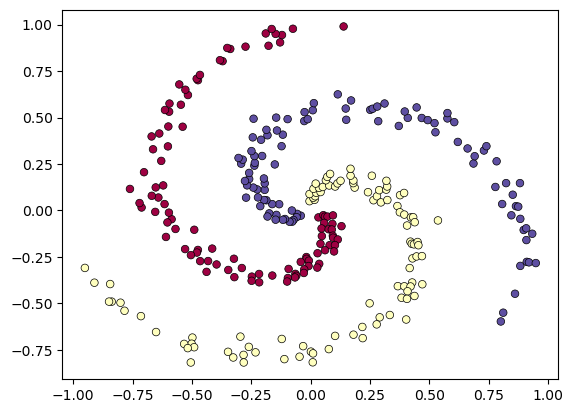

In [16]:
np.random.seed(1)
X, y = generate_spiral_dataset(100, 2, 3)

plt.scatter(X[:, 0], X[:, 1], c = y, s = 30, cmap = plt.cm.Spectral, edgecolors="black", linewidths = 0.5)
plt.show()

The following is the implementation of the steps outlined in the [Calculating a Neural Network](#calculating_a_neural_network) section above. As with the perceptron, a function is defined to train the neural network and a function is defined to make predictions with the learned weights and bias. For the 2 layer neural network, 2 sets of weights and biases are needed - one for the hidden layer and one for the output layer.

In [17]:
def train_neural_network(X, y, W, b, W2, b2, epochs, learning_rate, reg):
    """Function to train a 2-layer neural network.
    
    Args:
    X             -- Input data (numpy array)
    y             -- Classes of the input data (numpy array)
    W             -- Input layer weights (numpy array)
    b             -- Input layer bias (numpy array)
    W2            -- Hidden layer weights (numpy array)
    b2            -- Hidden layer bias (numpy array)
    epochs        -- Number of epochs (hyperparameter - integer)
    learning_rate -- Learning rate (hyperparameter - float or integer)
    reg           -- Regularization strength (hyperparameter - float or integer)
    """
    # Calculate the total number of training examples
    num_examples = X.shape[0]
    # Initialize empty list to store the loss
    losses = []
    
    # Gradient descent loop
    for i in range(epochs):
        # Calculate class scores of the hidden layer and pass through ReLU nonlinearity
        z = np.dot(X, W) + b
        hidden_layer = np.maximum(0, z)
        scores = np.dot(hidden_layer, W2) + b2
        
        # Calculate normalized class probabilities (softmax on the output layer)
        exp_scores = np.exp(scores)
        normalized_probs = exp_scores / np.sum(exp_scores, axis = 1, keepdims = True)
        
        # Compute loss
        # Obtain the true unnormalized log probabilities
        correct_logprobs = -np.log(normalized_probs[range(num_examples), y])
        # Calculate cross-entropy loss
        cross_entropy_loss = np.sum(correct_logprobs) / num_examples
        # Calculate regularization loss
        reg_loss = 0.5 * reg * np.sum(W * W) + 0.5 * reg * np.sum(W2 * W2)
        # Calculate full loss
        loss = cross_entropy_loss + reg_loss
        # Print the current loss
        if i % 1000 == 0:
            print(f"Iteration {i}: loss {loss}")
        elif i == epochs - 1:
            print(f"Final iteration: loss {loss}")
        # Append the current loss to the losses list
        losses.append(loss)
        
        # Calculate the gradient on scores
        dscores = normalized_probs
        dscores[range(num_examples), y] -= 1
        dscores /= num_examples
        
        # Backpropagate the gradient into W2 and b2 (hidden layer weights & bias)
        dW2 = np.dot(np.transpose(hidden_layer), dscores)
        db2 = np.sum(dscores, axis = 0, keepdims = True)
        
        # Backpropagate into the hidden layer
        dhidden = np.dot(dscores, np.transpose(W2))
        # Backpropagate the ReLU nonlinearity
        dhidden[hidden_layer <= 0] = 0
        
        # Backpropagate into input layer weights and bias
        dW = np.dot(np.transpose(X), dhidden)
        db = np.sum(dhidden, axis = 0, keepdims = True)
        
        # Add regularization gradient contribution
        dW2 += reg * W2
        dW += reg * W
        
        # Parameter update
        W += -learning_rate * dW
        b += -learning_rate * db
        W2 += -learning_rate * dW2
        b2 += -learning_rate * db2
    
    # Convert losses list into numpy array
    losses = np.array(losses)
    
    return W, b, W2, b2, losses

def predict_neural_network(X, W, b, W2, b2):
    """Predict the class of input data with a 2-layer neural network.
    
    Args:
    X  -- Input data (numpy array)
    W  -- Input layer weights (numpy array)
    b  -- Input layer bias (numpy array)
    W2 -- Hidden layer weights (numpy array)
    b2 -- Hidden layer bias (numpy array)
    """
    hidden_layer = np.maximum(0, np.dot(X, W) + b)
    z = np.dot(hidden_layer, W2) + b2
    prediction = np.argmax(z, axis = 1)
    return prediction

Now, the parameters and hyperparameters can be initialized, the neural network can be trained with the training data, and predictions can be made with the test data.

In [18]:
# Weights & bias initialization
D = X.shape[1]                    # Number of dimensions
K = len(np.unique(y))             # Number of classes
h = 100                           # Size of the hidden layer

W = 0.01 * np.random.randn(D, h)  # Hidden layer weights
b = np.zeros((1, h))              # Hidden layer bias
W2 = 0.01 * np.random.randn(h, K) # Output layer weights
b2 = np.zeros((1, K))             # Output layer bias

# Hyperparameter initialization
epochs = 10000                    # Number of epochs
learning_rate = 1e-0              # Step size
reg = 1e-3                        # Regularization strength

# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [19]:
# Train the neural network & time training duration
import time
start = time.time()

W_learned, b_learned, W2_learned, b2_learned, losses = train_neural_network(
    X_train, y_train, W, b, W2, b2, epochs, learning_rate, reg)

end = time.time()
training_duration = end - start
print(f"\nTraining duration: {training_duration:.2f} seconds")

Iteration 0: loss 1.0986600968013311
Iteration 1000: loss 0.28165508542426043
Iteration 2000: loss 0.22932583303010523
Iteration 3000: loss 0.22489654444010954
Iteration 4000: loss 0.2239079776873913
Iteration 5000: loss 0.22369416753384797
Iteration 6000: loss 0.22358891042197115
Iteration 7000: loss 0.22351802357698636
Iteration 8000: loss 0.2234727444683077
Iteration 9000: loss 0.22341552418306912
Final iteration: loss 0.22322489192818237

Training duration: 5.88 seconds


In [20]:
pred = predict_neural_network(X_test, W_learned, b_learned, W2_learned, b2_learned)

As with the perceptron, we can determine the quality of the model's prediction with a **confusion matrix** and a **classification report**. This shows that the model misclassified one data point, which yields an overall accuracy of 0.98.

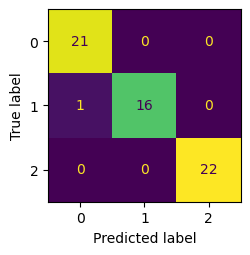

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.94      0.97        17
           2       1.00      1.00      1.00        22

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



In [21]:
# Confusion matrix
conf = confusion_matrix(pred, y_test)
disp = ConfusionMatrixDisplay(conf)
fig, ax = plt.subplots(figsize = (2.5, 2.5))
disp.plot(ax = ax, colorbar = False)
plt.show()

# Classification report
report = classification_report(pred, y_test, digits = 2, zero_division = 0.0)
print(f"Classification Report:\n {report}")

As the neural network training function was designed to return the loss values of each iteration, we can plot them to observe the evolution of the loss across the training.

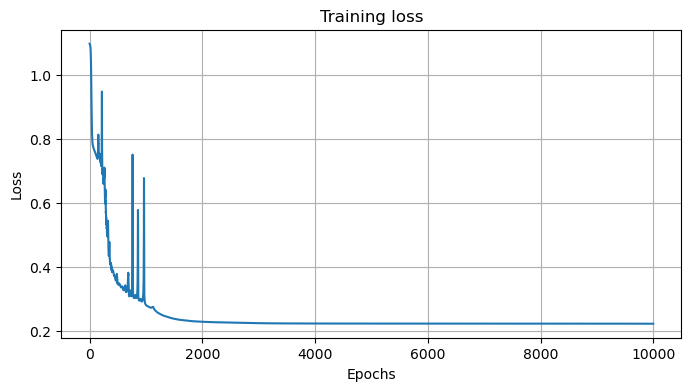

In [22]:
fig, ax = plt.subplots(figsize = (8, 4))
ax.plot(losses)
ax.set(xlabel = "Epochs", ylabel = "Loss", title = "Training loss")
ax.grid()
plt.show()

Finally, we can also plot the decision boundaries for the test data, the training data, and the entire data set.<a name="footnote_ref-26"></a>[<sup>26</sup>](#footnote-26)

In [23]:
def plot_neural_network(X_test, y_test, X_train, y_train, X, y, W, b, W2, b2):
    """Plot the input of a perceptron with the decision boundary.
    
    Args:
    X_test  -- Test data to plot (numpy array)
    y_test  -- Test classification lables (numpy array)
    X_train -- Training data to plot (numpy array)
    y_train -- Training classification lables (numpy array)
    X       -- Dataset to plot (numpy array)
    y       -- Classification lables (numpy array)
    W       -- Input layer weights (numpy array)
    b       -- Input layer bias (numpy array)
    W2      -- Hidden layer weights (numpy array)
    b2      -- Hidden layer bias (numpy array)
    """
    x_min, x_max = X[:, 0].min() - 0.3, X[:, 0].max() + 0.3
    y_min, y_max = X[:, 1].min() - 0.3, X[:, 0].max() + 0.3
    
    x_grid = np.arange(x_min, x_max, 0.03)
    y_grid = np.arange(y_min, y_max, 0.03)
    xx, yy = np.meshgrid(x_grid, y_grid)
    
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    grid = np.hstack((r1, r2))
    
    yhat = predict_neural_network(grid, W, b, W2, b2)
    zz = yhat.reshape(xx.shape)
    
    levels = [-1, 0, 1, 2]
    
    # Generate plot and subplots; general formatting
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex = True, sharey = True)
    fig.set_figheight(5)
    fig.set_figwidth(16)
    fig.suptitle("Neural network decision boundary", fontsize = 12)
    
    # Generate subplot for test data
    ax1.contourf(xx, yy, zz, levels, cmap = plt.cm.Spectral, alpha = 0.8)
    ax1.scatter(X_test[:, 0], X_test[:, 1], c = y_test, s = 30, cmap = plt.cm.Spectral, edgecolors="black", linewidths = 0.5)
    ax1.set_title("Test data", fontsize = 10)
    
    # Generate subplot for training data 
    ax2.contourf(xx, yy, zz, levels, cmap = plt.cm.Spectral, alpha = 0.8)
    ax2.scatter(X_train[:, 0], X_train[:, 1], c = y_train, s = 30, cmap = plt.cm.Spectral, edgecolors="black", linewidths = 0.5)
    ax2.set_title("Training data", fontsize = 10)
    
    # Generate subplot for entire dataset
    ax3.contourf(xx, yy, zz, levels, cmap = plt.cm.Spectral, alpha = 0.8)
    ax3.scatter(X[:, 0], X[:, 1], c = y, s = 30, cmap = plt.cm.Spectral, edgecolors="black", linewidths = 0.5)
    ax3.set_title("Entire dataset", fontsize = 10)
    
    plt.show()

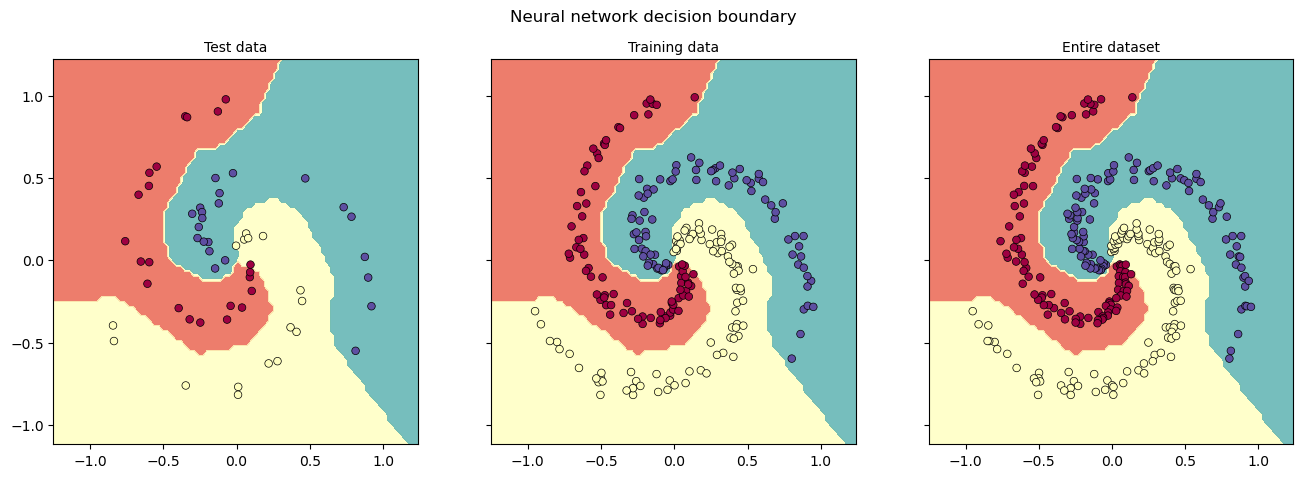

In [24]:
plot_neural_network(X_test, y_test, X_train, y_train, X, y, W_learned, b_learned, W2_learned, b2_learned)

### 2-Layer Feed-Forward Neural Network with *Keras*/*TensorFlow* <a id="2-layer_neural_network_keras_tensorflow"></a>

*TensorFlow* is a machine learning and AI framework. *Keras* is a high-level API for the *TensorFlow* platform with the goal of making it as easy as possible to use. *TensorFlow* operates on **tensors**, multidimensional arrays similar to *NumPy* arrays. However, tensors offer more flexibility for machine learning tasks, especially automatic differentiation (e.g., used for calculating gradients), and GPU and distributed processing. Typically, *TensorFlow* expects tensors as inputs, but any object that can be converted to a tensor will be accepted.<a name="footnote_ref-27"></a>[<sup>27</sup>](#footnote-27)

*Keras* provides **layers** and **models** as its core data structures. Layers (`tf.keras.layers.Layer` class) encapsulate weights, computations, and data pre-processing tasks. Models are objects that group layers together and that can be trained on data. The `Sequential` model (`tf.keras.Sequential` class) is the simplest model type, i.e., a linear stack of layers.<a name="footnote_ref-28"></a>[<sup>28</sup>](#footnote-28) The typical *Keras* workflow consists of four steps:

1. Define the neural network
2. Compile (i.e., configure) the neural network
3. Fit the neural network
4. Evaulate the neural network

In the following example, *Keras* is used to create a neural network to classify the spiral data set.<a name="footnote_ref-29"></a>[<sup>29</sup>](#footnote-29)

**1. Defining the neural network**

The *Keras* `Sequential` class groups a linear stack of layers into a model object with training and inference features, where each layer has exactly one input tensor and one output tensor.<a name="footnote_ref-30"></a>[<sup>30</sup>](#footnote-30) The layers are defined using the `Layers` class from which all layers inherit.<a name="footnote_ref-31"></a>[<sup>31</sup>](#footnote-31)

First, a sequential model object is created using the `Sequential` class. Then, the layers are added to the model using the `Dense` class to define the network architecture. `Dense` is used to define fully-connected layers and performs the matrix multiplication of the input and the *kernel* (i.e., the weights matrix), adds the bias, and passes the result through the activation function. The number of nodes is defined by the first argument, `units`, which defines the dimensionality of the output space.<a name="footnote_ref-32"></a>[<sup>32</sup>](#footnote-32)

The input layer can be defined in two ways:

1. By adding a dedicated `InputLayer` (used in this example), or
2. by passing the `input_shape` argument to the first dense layer (in this case, the command creates **both the input layer and the (first) hidden layer**.

The `input_shape` argument expects a tuple that defines the shape of the input data. In this example, the training data `X_train` is a numpy array of shape `(240, 2)`, i.e., each of the 240 examples is an array of length 2. Therefore, the tuple `(2,)` is passed to the `input_shape` argument, indicating that each sample consists of 2 values. The shape of the tensors that are passed to the subsequent layers is computed automatically.

The activation function to be used in each layer is passed to the `activation` argument. Built-in activations can be passed with their string identifier (e.g., `relu`, `softmax`, `sigmoid`, etc.).<a name="footnote_ref-33"></a>[<sup>33</sup>](#footnote-33)

**2. Compiling the neural network**

The model is **compiled** (i.e., configured) with the `compile` method. It takes several arguments, of which the following will be used in this example:

* `optimizer`: the algorithm/method used to adjust the weights after each batch or epoch. [Various algorithms](https://www.kaggle.com/code/residentmario/keras-optimizers/notebook) are available out of the box.
* `loss`: the loss function to be used by the model.
* `metrics`: a list of the metrics used to evalueate the model performance.

After compilation, the `summary` method prints an overview of the model.

In [25]:
# import tensorflow as tf

# 1. DEFINING THE NETWORK
# Create model object
model = tf.keras.Sequential()

# Add input layer to the model
model.add(tf.keras.layers.InputLayer(input_shape = (2,)))
# Add hidden layer to the model
model.add(tf.keras.layers.Dense(100, activation = "relu"))
# Add output layer to the model
model.add(tf.keras.layers.Dense(3, activation = "softmax"))

# 2. COMPILING THE NETWORK
model.compile(optimizer = "adam",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               300       
                                                                 
 dense_1 (Dense)             (None, 3)                 303       
                                                                 
Total params: 603 (2.36 KB)
Trainable params: 603 (2.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**3. Fitting the neural network**

Now that the model is set up, it can be **fitted** (i.e., trained) with the `fit` function. But first, the scalar-value class labels (`y`) must be converted into a **one-hot vector** as sparse scalar representation is not suitable for multiclass classification models that output probabilities per class. This is achieved with the Keras `to_categorical` function. Then, the model is fitted and the number of epochs and the verbosity mode (i.e., the outputs during training) are specified – this model converges after ~450 epochs and the verbosity is set to `0`, i.e., no outputs are generated. To signal that the fitting is completed, a corresponding message is printed with the training duration.

In [26]:
# 3. FITTING THE NETWORK
# One-hot encoding for train and test class labels
y_train_cat = tf.keras.utils.to_categorical(y_train, 3)
y_test_cat = tf.keras.utils.to_categorical(y_test, 3)
print(f"One-hot example: \n{y_train_cat[:3]}")

# Train the neural network & time training duration
start = time.time()

history = model.fit(X_train,
                    y_train_cat,
                    epochs = 500,                  
                    verbose = 0)

end = time.time()
training_duration = end - start
print(f"\nModel fitted. \nTraining duration: {training_duration:.2f} seconds")

One-hot example: 
[[0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]

Model fitted. 
Training duration: 9.71 seconds


**4. Evaluating the neural network**

To evaluate the model, we can make a **prediction** on the test data using the `predict` method. This method returns the **class probabilities**, so we use the `argmax` function to convert them into **class labels**.

In [27]:
prediction = np.argmax(model.predict(X_test), axis = 1)
print(prediction)

2/2 [==============================] - 0s 0s/step
[2 2 1 0 2 2 1 1 0 1 2 0 2 0 1 2 2 2 1 1 0 1 2 2 1 0 2 2 1 2 0 1 0 0 2 1 0
 0 0 0 0 0 2 0 0 0 2 2 1 2 1 1 2 0 2 2 0 0 1 0]


The `Sequential` class provides its own `evaluate` method to obtain the **loss and accuracy** values of the model by passing the test data. The display labels can be obtained with the `metrics_names` attribute.

In [28]:
# 4. EVALUATING THE NETWORK
display_labels = model.metrics_names
evaluation = model.evaluate(X_test, y_test_cat)
print(f"{display_labels[0]}: {evaluation[0]}, {display_labels[1]}: {evaluation[1]}")

2/2 [==============================] - 0s 0s/step - loss: 0.0337 - accuracy: 1.0000
loss: 0.033737123012542725, accuracy: 1.0


The model yields an accuracy score of 1, i.e., the entire test data set has been classified correctly. We can also utilize the tools used in the previous examples, i.e., the **confusion matrix** and the **classification report** from *sklearn*.

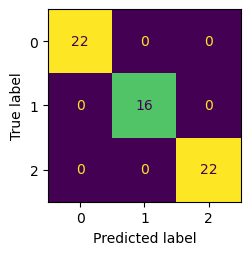

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        22

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [29]:
# Confusion matrix
conf = confusion_matrix(prediction, y_test)
disp = ConfusionMatrixDisplay(conf)
fig, ax = plt.subplots(figsize = (2.5, 2.5))
disp.plot(ax = ax, colorbar = False)
plt.show()

# Classification report
report = classification_report(prediction, y_test, digits = 2, zero_division = 0.0)
print(f"Classification Report:\n {report}")

Keras automatically applies a `History` object to each model which is returned by the `fit` method. In step 3, this object has been saved to the variable `history`. The `History` object is a dictionary that contains the **accuracy and loss values for each epoch during training**.

In [30]:
print("History type:", type(history.history))
print("Data in the History dict:", history.history.keys())
print("Sample data:", history.history["accuracy"][:3])

History type: <class 'dict'>
Data in the History dict: dict_keys(['loss', 'accuracy'])
Sample data: [0.28333333134651184, 0.3375000059604645, 0.375]


This data can be used to plot two corresponding **charts**.

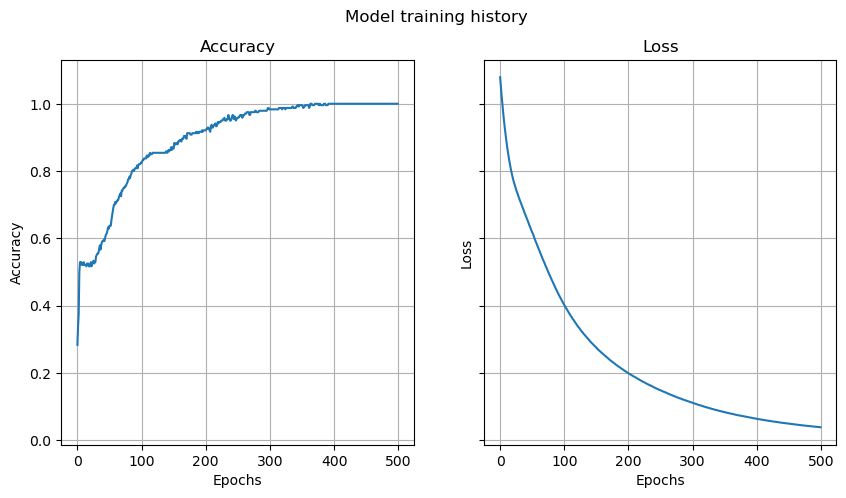

In [31]:
# Create accuracy and loss charts
# Generate plot and subplots; general formatting
fig, (ax1, ax2) = plt.subplots(1, 2, sharex = True, sharey = True)
fig.set_figheight(5)
fig.set_figwidth(10)
fig.suptitle("Model training history", fontsize = 12)

# Generate subplot for accuracy
ax1.plot(history.history["accuracy"])
ax1.set(xlabel = "Epochs", ylabel = "Accuracy", title = "Accuracy")
ax1.grid()

# Generate subplot for loss
ax2.plot(history.history["loss"])
ax2.set(xlabel = "Epochs", ylabel = "Loss", title = "Loss")
ax2.grid()

Finally, we can also plot the **decision boundaries** for the *Keras* model.

208/208 [==============================] - 0s 2ms/step


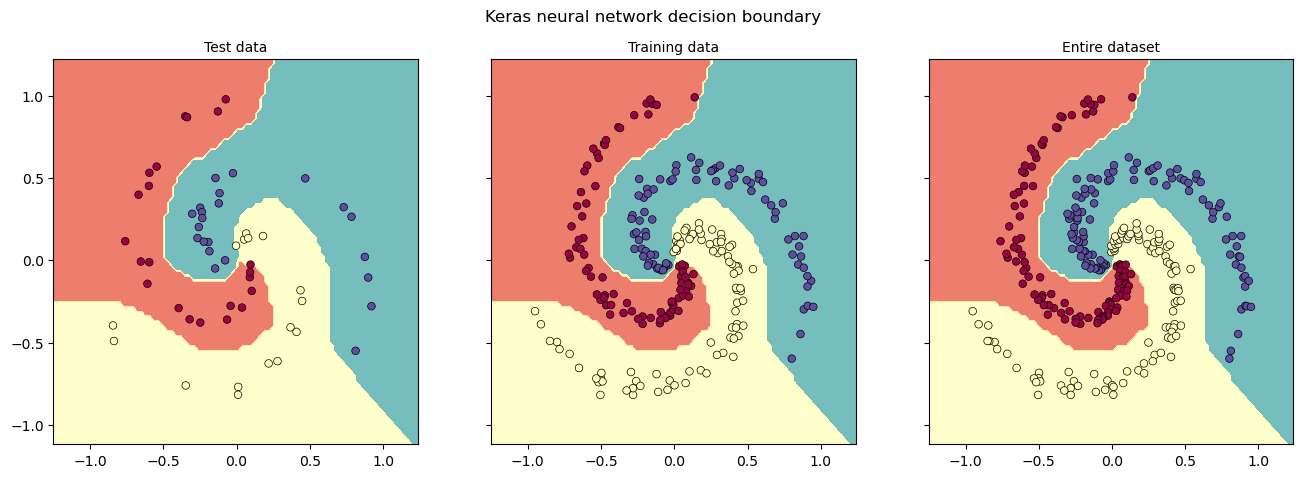

In [32]:
# Define bounds of the plotting surface
x_min, x_max = X[:, 0].min() - 0.3, X[:, 0].max() + 0.3
y_min, y_max = X[:, 1].min() - 0.3, X[:, 0].max() + 0.3

# Define x and y scale (resolution)
x_grid = np.arange(x_min, x_max, 0.03)
y_grid = np.arange(y_min, y_max, 0.03)
# Create a grid from x and y scale
xx, yy = np.meshgrid(x_grid, y_grid)

# Flatten the grid to 2 vectors
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# Stack the vectors horizontally (i.e., in 2 columns) to create inputs for the model
grid = np.hstack((r1, r2))

# Make predictions on the grid, apply argmax to obtain class labels instead of probs
yhat = np.argmax(model.predict(grid), axis = 1)
# Reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)

# Define levels to plot
levels = [-1, 0, 1, 2]

# Generate plot and subplots; general formatting
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex = True, sharey = True)
fig.set_figheight(5)
fig.set_figwidth(16)
fig.suptitle("Keras neural network decision boundary", fontsize = 12)

# Generate subplot for test data
ax1.contourf(xx, yy, zz, levels, cmap = plt.cm.Spectral, alpha = 0.8)
ax1.scatter(X_test[:, 0], X_test[:, 1], c = y_test, s = 30, cmap = plt.cm.Spectral, edgecolors="black", linewidths = 0.5)
ax1.set_title("Test data", fontsize = 10)

# Generate subplot for training data 
ax2.contourf(xx, yy, zz, levels, cmap = plt.cm.Spectral, alpha = 0.8)
ax2.scatter(X_train[:, 0], X_train[:, 1], c = y_train, s = 30, cmap = plt.cm.Spectral, edgecolors="black", linewidths = 0.5)
ax2.set_title("Training data", fontsize = 10)

# Generate subplot for entire dataset
ax3.contourf(xx, yy, zz, levels, cmap = plt.cm.Spectral, alpha = 0.8)
ax3.scatter(X[:, 0], X[:, 1], c = y, s = 30, cmap = plt.cm.Spectral, edgecolors="black", linewidths = 0.5)
ax3.set_title("Entire dataset", fontsize = 10)

plt.show()

## Sources <a id="sources"></a>

<a name="footnote-1"></a><sup>1</sup> [McCulloch, W., Pitts, W. (1943), A Logical Calculus of Ideas Immanent in Nervous Activity, *Bulletin of Mathematical Biophysics*, vol. 5, pp 127-147.](https://jontalle.web.engr.illinois.edu/uploads/410-NS.F22/McCulloch-Pitts-1943-neural-networks-ocr.pdf) [$\uparrow$](#footnote_ref-1) <br>
<a name="footnote-2"></a><sup>2</sup> [Rosenblatt, F. (1957), *The Perceptron. A Perceiving and Recognizing Automaton*, Report 85-460-1, Cornell Aeronautical Laboratory, Buffalo, NY.](https://blogs.umass.edu/brain-wars/files/2016/03/rosenblatt-1957.pdf) [$\uparrow$](#footnote_ref-2) <br>
<a name="footnote-3"></a><sup>3</sup> [Wikipedia (2023). *Perceptron*.](https://en.wikipedia.org/wiki/Perceptron#Steps) [$\uparrow$](#footnote_ref-3) <br>
<a name="footnote-4"></a><sup>4</sup> [Brownlee, J. (2020). *Perceptron Algorithm for Classification in Python*.](https://machinelearningmastery.com/perceptron-algorithm-for-classification-in-python/), see also [Raschka, S. (2015). *Single-Layer Neural Networks and Gradient Descent*.](https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html) [$\uparrow$](#footnote_ref-4) <br>
<a name="footnote-5"></a><sup>5</sup> [scikit-learn User Guide (2023). *Generated datasets*](https://scikit-learn.org/stable/datasets/sample_generators.html) [$\uparrow$](#footnote_ref-5) <br>
<a name="footnote-6"></a><sup>6</sup> With some inspiration from [Sidhart (2023). *The Perceptron Algorithm: From Scratch Using Python*.](https://www.pycodemates.com/2022/12/perceptron-algorithm-understanding-and-implementation-python.html) [$\uparrow$](#footnote_ref-6) <br>
<a name="footnote-7"></a><sup>7</sup> [scikit-learn Documentation (2023). *sklearn.metrics.confusion_matrix*.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) [$\uparrow$](#footnote_ref-7) <br>
<a name="footnote-8"></a><sup>8</sup> [scikit-learn Documentation (2023). *sklearn.metrics.ConfusionMatrixDisplay*.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html) [$\uparrow$](#footnote_ref-8) <br>
<a name="footnote-9"></a><sup>9</sup> [scikit-learn Documentation (2023). *sklearn.metrics.classification_report*.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) [$\uparrow$](#footnote_ref-9) <br>
<a name="footnote-10"></a><sup>10</sup> [scikit-learn User Guide (2023). *Classification Report*.](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) [$\uparrow$](#footnote_ref-10) <br>
<a name="footnote-11"></a><sup>11</sup> [Wikipedia (2023). *Precision and recall*.](https://en.wikipedia.org/wiki/Precision_and_recall) [$\uparrow$](#footnote_ref-11) <br>
<a name="footnote-12"></a><sup>12</sup> [Wikipedia (2023). *F-score*.](https://en.wikipedia.org/wiki/F-score) [$\uparrow$](#footnote_ref-12) <br>
<a name="footnote-13"></a><sup>13</sup> [Wikipedia (2023). *Accuracy and precision*.](https://en.wikipedia.org/wiki/Accuracy_and_precision#In_binary_classification
) [$\uparrow$](#footnote_ref-13) <br>
<a name="footnote-14"></a><sup>14</sup> [Wikipedia (2023). *Multilayer perceptron*.](https://en.wikipedia.org/wiki/Multilayer_perceptron) [$\uparrow$](#footnote_ref-14) <br>
<a name="footnote-15"></a><sup>15</sup> [Oppermann, A. (2022). *How Loss Functions Work in Neural Networks and Deep Learning*.](https://builtin.com/machine-learning/loss-functions) [$\uparrow$](#footnote_ref-15) <br>
<a name="footnote-16"></a><sup>16</sup> [Yathish, V. (2022). *Loss Functions and Their Use In Neural Networks. Overview of loss functions and their implementations*.](https://towardsdatascience.com/loss-functions-and-their-use-in-neural-networks-a470e703f1e9) [$\uparrow$](#footnote_ref-16) <br>
<a name="footnote-17"></a><sup>17</sup> [Gupta, S. (2023). *The 7 Most Common Machine Learning Loss Functions*.](https://builtin.com/machine-learning/common-loss-functions) [$\uparrow$](#footnote_ref-17) <br>
<a name="footnote-18"></a><sup>18</sup> With inspiration from Stanford course CS231 - Deep Learning for Computer Vision ([*Convolutional Neural Networks for Visual Recognition*](https://cs231n.github.io/neural-networks-1/) / [*Training a Neural Network*](https://cs231n.github.io/neural-networks-case-study/#net)) and [University of Toronto course CSC 411](https://www.cs.toronto.edu/~jlucas/teaching/csc411/lectures/lec10_handout.pdf) [$\uparrow$](#footnote_ref-18) <br>
<a name="footnote-19"></a><sup>19</sup> [Data Base Camp (2023). *Was ist die ReLU-Funktion (Rectified Linear Unit)?*.](https://databasecamp.de/ki/relu) [$\uparrow$](#footnote_ref-19) <br>
<a name="footnote-20"></a><sup>20</sup> [Wikipedia (2023). *Rectifier (neural networks)*.](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) [$\uparrow$](#footnote_ref-20) <br>
<a name="footnote-21"></a><sup>21</sup> For more information, see [Brownlee, J. (2020). *A Gentle Introduction to Cross-Entropy for Machine Learning*.](https://machinelearningmastery.com/cross-entropy-for-machine-learning/) [$\uparrow$](#footnote_ref-21) <br>
<a name="footnote-22"></a><sup>22</sup> [Google (2023). *Introduction to Machine Learning Course - Regularization for Simplicity: Lambda*.](https://developers.google.com/machine-learning/crash-course/regularization-for-simplicity/lambda?hl=en) [$\uparrow$](#footnote_ref-22) <br>
<a name="footnote-23"></a><sup>23</sup> [Stack Overflow (2015). *Understanding softmax classifier*.](https://stackoverflow.com/questions/32258773/understanding-softmax-classifier) [$\uparrow$](#footnote_ref-23) <br>
<a name="footnote-24"></a><sup>24</sup> [Cross Validated (2016). *Intuition behind output neuron error signal in backpropagation*.](https://stats.stackexchange.com/questions/240539/intuition-behind-output-neuron-error-signal-in-backpropagation) [$\uparrow$](#footnote_ref-24) <br><a name="footnote-25"></a><sup>25</sup> [Stack Exchange (2017). *Gradients for bias terms in backpropagation*.](https://datascience.stackexchange.com/questions/20139/gradients-for-bias-terms-in-backpropagation) [$\uparrow$](#footnote_ref-25) <br>
<a name="footnote-26"></a><sup>26</sup> Decision surface plotting with inspiration from [@kvssetty (2020). *How To Plot A Decision Boundary For Machine Learning Algorithms in Python*.](https://hackernoon.com/how-to-plot-a-decision-boundary-for-machine-learning-algorithms-in-python-3o1n3w07) and [Stanford course CS224N (2023). *Vanishing Gradients*.](https://web.stanford.edu/class/archive/cs/cs224n/cs224n.1174/lectures/vanishing_grad_example.html) [$\uparrow$](#footnote_ref-26) <br>
<a name="footnote-27"></a><sup>27</sup> [TensorFlow Guide (2024). *TensorFlow basics*.](https://www.tensorflow.org/guide/basics) [$\uparrow$](#footnote_ref-27) <br>
<a name="footnote-28"></a><sup>28</sup> [TensorFlow Documentation (2024). *Keras: The high-level API for TensorFlow*.](https://www.tensorflow.org/guide/keras) [$\uparrow$](#footnote_ref-28) <br>
<a name="footnote-29"></a><sup>29</sup> For a detailed walkthrough see [Brownlee, J. (2022). *Your First Deep Learning Project in Python with Keras Step-by-Step*.](https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/) [$\uparrow$](#footnote_ref-29) <br>
<a name="footnote-30"></a><sup>30</sup> [TensorFlow Documentation (2024). *tf.keras.Sequential*.](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) [$\uparrow$](#footnote_ref-30) <br>
<a name="footnote-31"></a><sup>31</sup> [TensorFlow Documentation (2024). *tf.keras.layers.Layer*.](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer) [$\uparrow$](#footnote_ref-31) <br>
<a name="footnote-32"></a><sup>32</sup> [TensorFlow Documentation (2024). *tf.keras.layers.Dense*.](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) [$\uparrow$](#footnote_ref-32) <br>
<a name="footnote-33"></a><sup>33</sup> [Keras Documentation (2024). *Layer activation functions – About "advanced activation" layers*.](https://keras.io/api/layers/activations/#about-advanced-activation-layers) [$\uparrow$](#footnote_ref-33) <br>